In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rc 
plt.rcParams["axes.unicode_minus"] = False 
rc("font", family="Arial Unicode MS")
%matplotlib inline 

## 캐글 데이터 읽어오기

In [45]:
terror=pd.read_csv('../data/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

In [46]:
terror.rename(columns={'eventid':'ID','iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','nhostkid':'HostKid','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['ID','Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','HostKid','Motive']]
terror['casualities']=terror['Killed']+terror['Wounded']
terror.head(3)

,ID,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,HostKid,Motive,casualities
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,NaN,1.0
1,197000000002,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,1.0,NaN,0.0
2,197001000001,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,NaN,1.0


In [76]:
anal_Year=terror.pivot_table(index='Year',values='ID',aggfunc=np.count_nonzero)
anal_Year.head(10)

,ID
Year,
1970,651
1971,471
1972,568
1973,473
1974,581
1975,740
1976,923
1977,1319
1978,1526


---

# 분석 1: 연도별 테러발생 수 분석

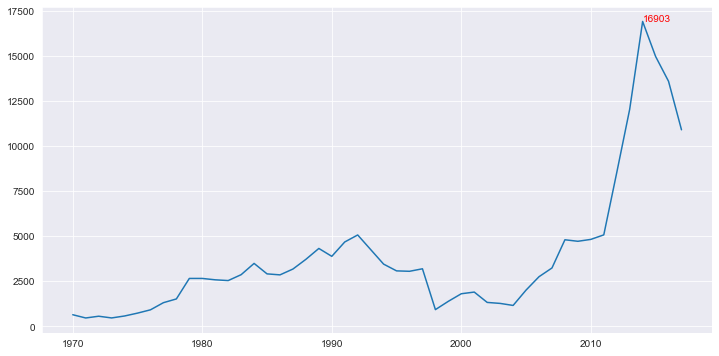

In [40]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
plt.plot(anal_Year.index, anal_Year['ID'])
dic = { y:x for x, y in zip(anal_Year.index, anal_Year['ID']) }
plt.text(dic[max(dic)],max(dic),
         max(dic),
         color='r'
        )
plt.show()

In [47]:
terror.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           181691 non-null  int64  
 1   Year         181691 non-null  int64  
 2   Month        181691 non-null  int64  
 3   Day          181691 non-null  int64  
 4   Country      181691 non-null  object 
 5   Region       181691 non-null  object 
 6   city         181257 non-null  object 
 7   latitude     177135 non-null  float64
 8   longitude    177134 non-null  float64
 9   AttackType   181691 non-null  object 
 10  Killed       171378 non-null  float64
 11  Wounded      165380 non-null  float64
 12  Target       181055 non-null  object 
 13  Summary      115562 non-null  object 
 14  Group        181691 non-null  object 
 15  Target_type  181691 non-null  object 
 16  Weapon_type  181691 non-null  object 
 17  HostKid      13572 non-null   float64
 18  Motive       50561 non-n

In [44]:
terror[terror['Year']>=2011]

,ID,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
99702,201101010001,2011,1,1,Egypt,Middle East & North Africa,Alexandria,30.762296,29.696268,Bombing/Explosion,23.0,97.0,Civilians,"01/01/2011: On Saturday at 0000 midnight, in t...",Army of Islam,Private Citizens & Property,Explosives,The specific motive for the attack is unknown.,120.0
99703,201101010003,2011,1,1,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Assassination,1.0,0.0,A police colonel,"01/01/2011: On Saturday, on the Mohammed al-Qa...",Unknown,Police,Firearms,The specific motive for the attack is unknown.,1.0
99704,201101010004,2011,1,1,Iraq,Middle East & North Africa,Baqubah,33.743240,44.623825,Bombing/Explosion,1.0,1.0,A house of a district mayor,"01/01/2011: On Saturday morning, in Ba'quba, D...",Unknown,Government (General),Explosives,The specific motive for the attack is unknown.,2.0
99705,201101010005,2011,1,1,Nigeria,Sub-Saharan Africa,Maiduguri,11.840929,13.141459,Facility/Infrastructure Attack,0.0,0.0,A church was targeted in the attack.,"01/01/2011: On Saturday night, in Maiduguri, B...",Boko Haram,Religious Figures/Institutions,Incendiary,The specific motive for the attack is unknown.,0.0
99706,201101020001,2011,1,2,Iraq,Middle East & North Africa,Baghdad,33.303566,44.371773,Armed Assault,1.0,0.0,A government worker,"01/02/2011: On Sunday, in Baghdad city, Baghda...",Unknown,Government (General),Firearms,The specific motive for the attack is unknown.,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,Somalia,Sub-Saharan Africa,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN,3.0
181687,201712310029,2017,12,31,Syria,Middle East & North Africa,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN,9.0
181688,201712310030,2017,12,31,Philippines,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN,0.0
181689,201712310031,2017,12,31,India,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN,0.0


In [48]:
print('Country with Highest Terrorist Attacks:',terror['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',terror['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',terror['Killed'].max(),'that took place in',terror.loc[terror['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


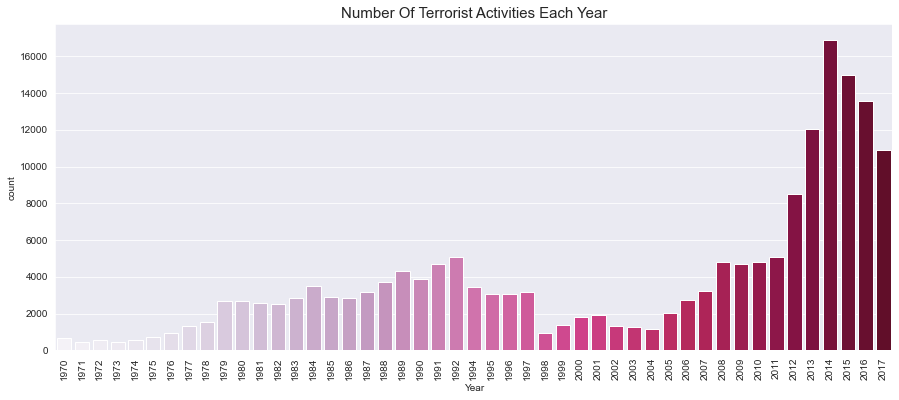

In [55]:
plt.subplots(figsize=(15,6))
sns.countplot('Year',data=terror,palette='PuRd')
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year',fontsize=15)
plt.show()

- 2000년대에 접어들며 상승세를 보이고 있고, 2010년대에 접어들면서 가파른 상승세를 보인다.
- 2001년 911테러, 2010년대에는 IS때문일까?

---

# 분석 2: 테러 발생 상위 10 국가

In [56]:
terror['Country'].value_counts().index[:10]

Index(['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia', 'Philippines',
       'Peru', 'El Salvador', 'United Kingdom', 'Turkey'],
      dtype='object')

In [306]:
anal_Country=terror.pivot_table(index='Country',values='ID',aggfunc=np.count_nonzero)
anal_Country=anal_Country.sort_values(by='ID',ascending=False).head(10)
anal_Country

,ID
Country,
Iraq,24636
Pakistan,14368
Afghanistan,12731
India,11960
Colombia,8306
Philippines,6908
Peru,6096
El Salvador,5320
United Kingdom,5235


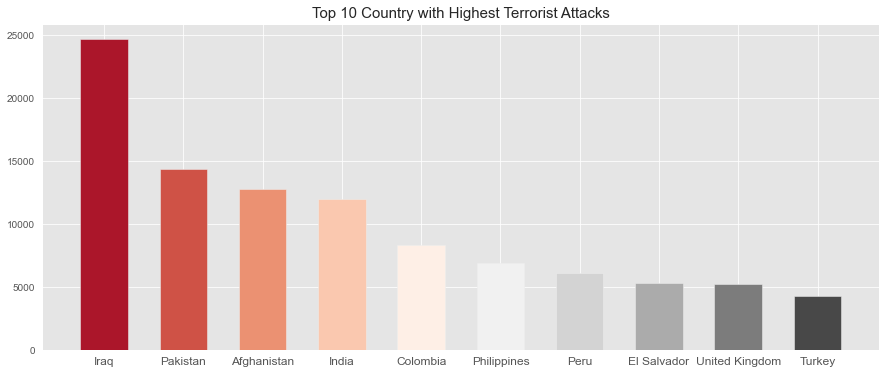

In [386]:
plt.figure(figsize=(15,6))
colors = sns.color_palette('RdGy',n_colors=10)
plt.bar(anal_Country.index, anal_Country['ID'],color=colors, width=0.6)
plt.title('Top 10 Country with Highest Terrorist Attacks',fontsize=15)
plt.xticks(fontsize=12)
plt.show()


---

# 분석 3: 상위 10 국가별 사망자 수, 부상자 수

In [79]:
Top10_Con=['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Colombia', 'Philippines', 'Peru', 'El Salvador', 'United Kingdom', 'Turkey']

In [114]:
anal_3=terror.pivot_table(index='Country', values=['Killed','Wounded','casualities'], aggfunc=np.sum)
# anal_3=anal_3.sort_values(by='',ascending=False)
anal_3

,Killed,Wounded,casualities
Country,,,
Afghanistan,39384.0,44277.0,80213.0
Albania,42.0,126.0,168.0
Algeria,11066.0,9150.0,19296.0
Andorra,0.0,0.0,0.0
Angola,3043.0,2455.0,4874.0
...,...,...,...
Yemen,8776.0,9328.0,16288.0
Yugoslavia,119.0,281.0,391.0
Zaire,324.0,211.0,507.0


In [115]:
temp = pd.merge(anal_Country,anal_3,how='left',on='Country')
Anal_3=temp.sort_values(by='ID',ascending=False).head(10)
Anal_3

,ID,Killed,Wounded,casualities
Country,,,,
Iraq,24636,78589.0,134690.0,202982.0
Pakistan,14368,23822.0,42038.0,64427.0
Afghanistan,12731,39384.0,44277.0,80213.0
India,11960,19341.0,28980.0,47108.0
Colombia,8306,14698.0,10328.0,23767.0
Philippines,6908,9559.0,13367.0,22361.0
Peru,6096,12771.0,4078.0,16246.0
El Salvador,5320,12053.0,5062.0,16181.0
United Kingdom,5235,3410.0,6106.0,7591.0


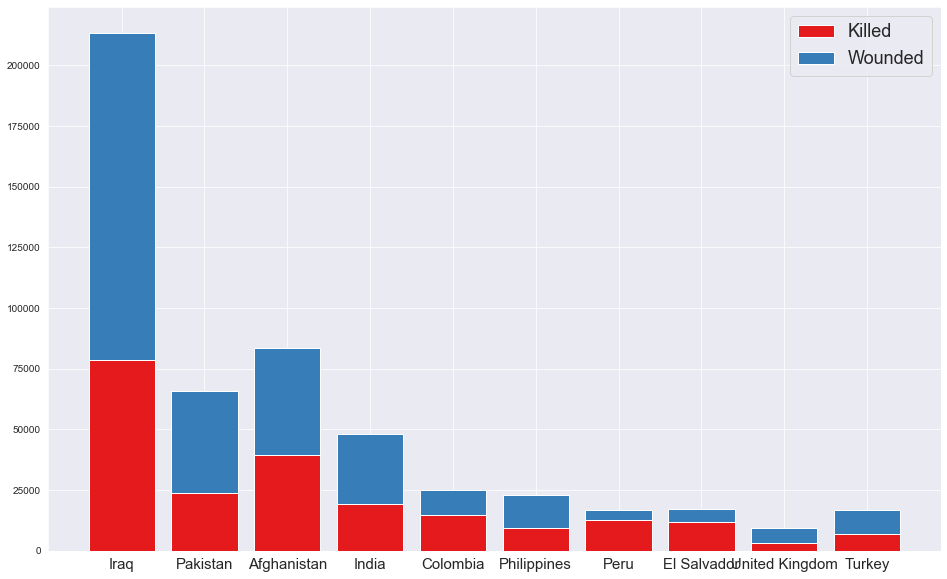

In [113]:
plt.figure(figsize=(16,10))
colors = sns.color_palette('Set1',2)
bott = 0
n = 0
for col in ['Killed','Wounded']:
    plt.bar(Anal_3.index, Anal_3[col], color=colors[n], bottom=bott, label=col)
    n += 1
    bott += Anal_3[col]
plt.legend(loc='upper right',fontsize=18)
plt.xticks(fontsize=15)
plt.show();

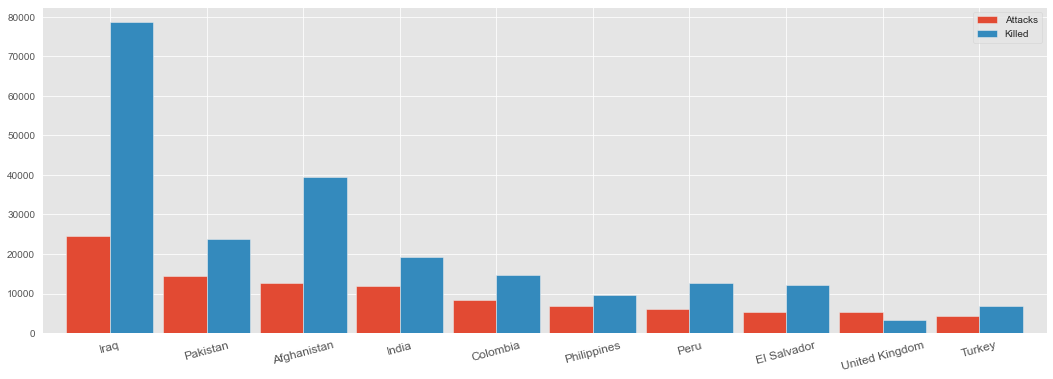

In [426]:
coun_terror=terror['Country'].value_counts()[:10].to_frame()
coun_terror.columns=['Attacks']
coun_kill=terror.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.xticks(rotation=15, fontsize=12)
plt.show()

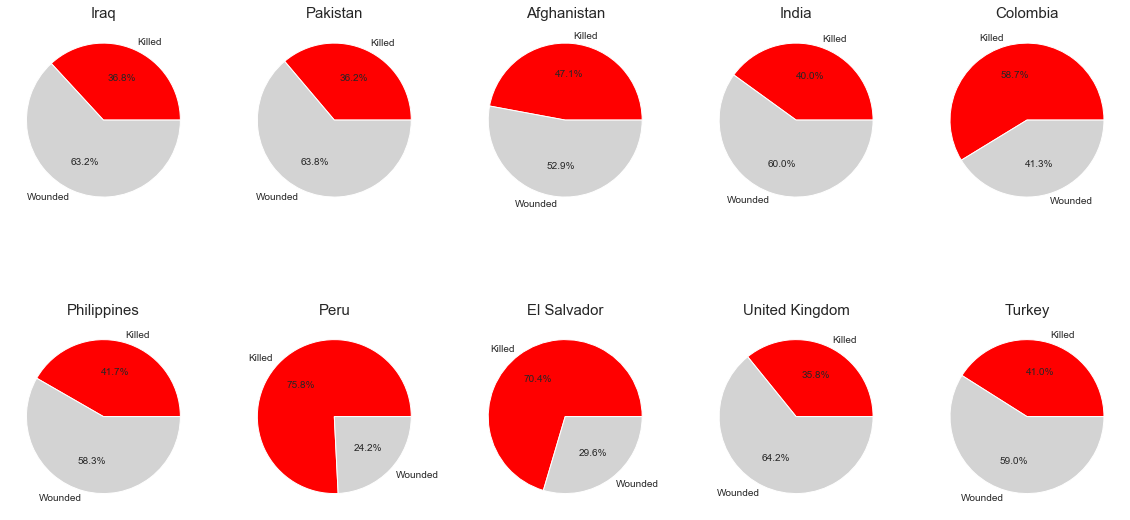

In [112]:
plt.figure(figsize=(20,10))
colors=['red','lightgray']

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.pie([Anal_3['Killed'][i],Anal_3['Wounded'][i]], labels=['Killed','Wounded'], colors=colors, autopct='%.1f%%')
    plt.title(Anal_3.index[i],fontsize=15,)
plt.show()

- 사망자 수가 부상자 수 보다 많은, 즉 50퍼센트를 넘기는 나라들은 '콜롬비아','페루','엘살바도르'이다.
- 이 세 나라는 모두 '중남미'에 위치한 나라들이다.

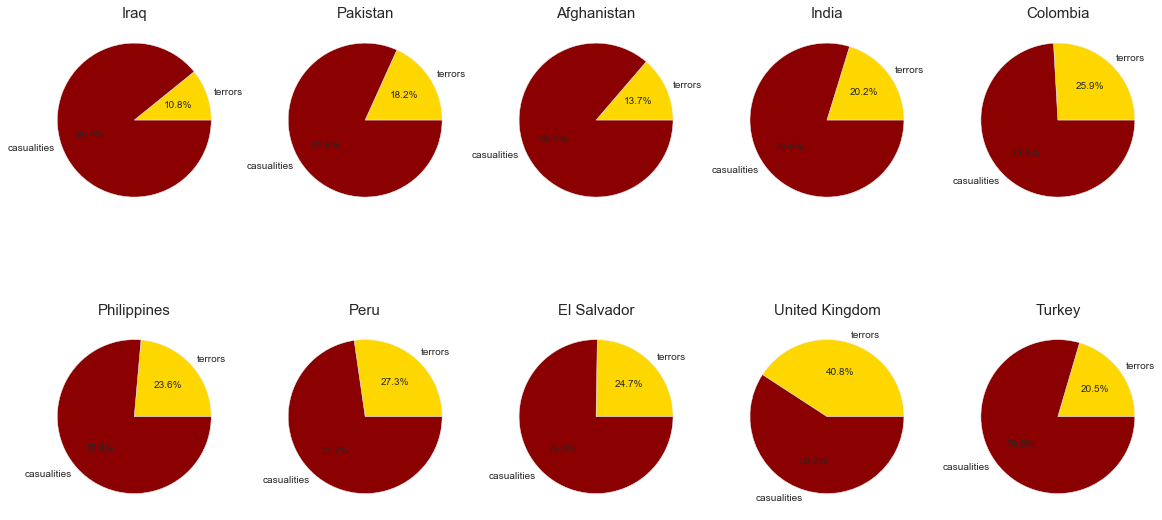

In [123]:
# f, ax = plt.subplots(2,5, figsize=(18,8))
plt.figure(figsize=(20,10))
colors=['gold','darkred']

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.pie([Anal_3['ID'][i],Anal_3['casualities'][i]], labels=['terrors','casualities'], colors=colors, autopct='%.1f%%')
    plt.title(Anal_3.index[i],fontsize=15)
plt.show()

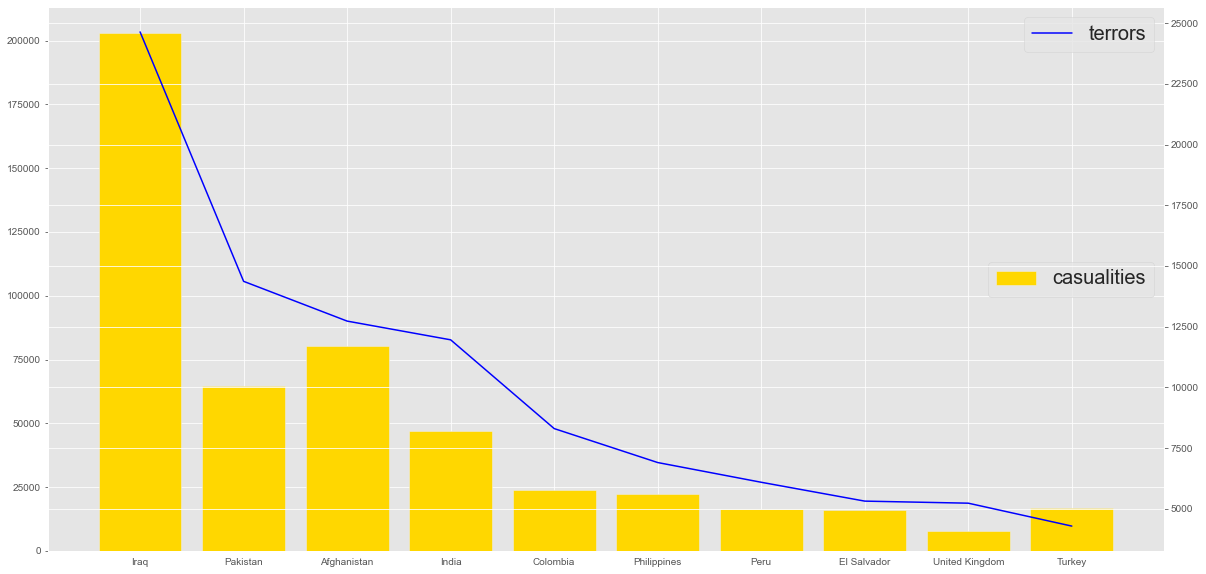

In [429]:
# 라인차트 막대차트 함께 그리기
# 라인 차트 그리기
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(111)
# plt.title('', fontsize=20)
ax1.bar(Anal_3.index, Anal_3['casualities'], label='casualities', color='gold')
ax1.legend(loc='center right', fontsize=20)

# y축 2개 설정
ax2 = ax1.twinx()
ax2.plot(Anal_3.index, Anal_3['ID'],label='terrors', color='b')
# ax2.set_ylabel('이용객 수',fontsize=13 ,rotation=270)

# ax1.set_yticks([i * 10 for i in range(6)])
# ax2.set_yticks([i * 1000000 for i in range(13)])

ax2.legend(loc='best', fontsize=20)
plt.show()

---

# 분석 4: 지역(권역)별 테러 양상

In [124]:
terror.head(3)

,ID,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,HostKid,Motive,casualities
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,NaN,1.0
1,197000000002,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,1.0,NaN,0.0
2,197001000001,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,NaN,1.0


In [201]:
pd.crosstab(terror['Region'],terror['AttackType'])

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown
Region,,,,,,,,,
Australasia & Oceania,51,36,75,71,3,6,13,11,16
Central America & Caribbean,4361,1254,3239,403,26,187,501,19,354
Central Asia,116,115,235,20,8,2,45,5,17
East Asia,117,55,330,200,18,3,14,42,23
Eastern Europe,1274,400,2766,260,26,21,220,62,115
Middle East & North Africa,9273,4206,30908,1115,138,100,2666,177,1891
North America,448,255,1534,906,18,67,123,73,32
South America,3875,2745,9039,803,67,234,1414,47,754
South Asia,11404,4301,21246,2189,93,120,3277,323,2021


In [202]:
# pd.crosstab(terror['Year'],terror['AttackType'])

In [152]:
anal_region=terror.pivot_table(index='Region',values=['Killed','Wounded','casualities'],aggfunc=np.sum)
anal_region=anal_region.loc[['Middle East & North Africa','South Asia','South America','Western Europe','Southeast Asia','Eastern Europe','North America','East Asia']]
anal_region.sort_values(by='casualities',ascending=False,inplace=True)
anal_region

,Killed,Wounded,casualities
Region,,,
Middle East & North Africa,137642.0,214308.0,329807.0
South Asia,101319.0,141360.0,234366.0
South America,28849.0,16704.0,43562.0
Southeast Asia,15637.0,26259.0,40841.0
North America,4916.0,21531.0,26398.0
Western Europe,6694.0,18332.0,22778.0
Eastern Europe,7415.0,12045.0,18239.0
East Asia,1152.0,9213.0,10003.0


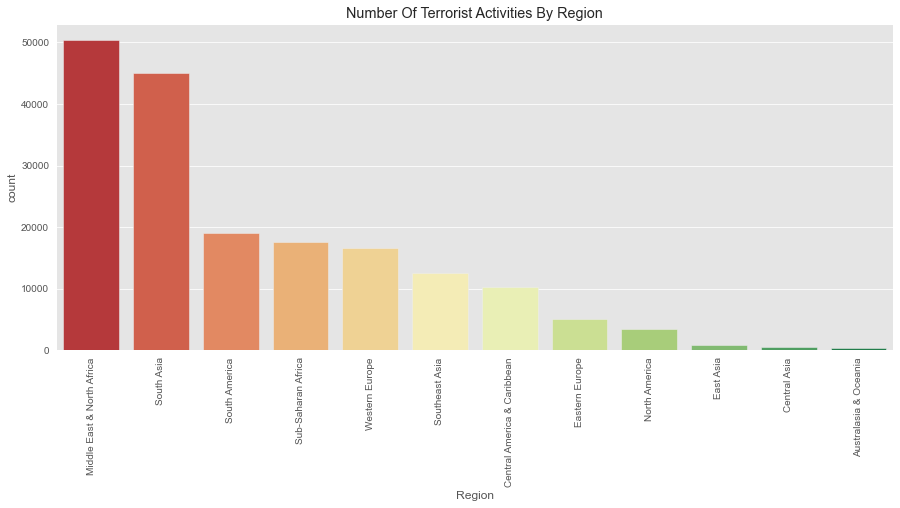

In [191]:
plt.subplots(figsize=(15,6))
sns.countplot('Region',data=terror,palette='RdYlGn',order=terror['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

In [230]:
pd.crosstab(terror['Region'],terror['Target_type'])

Target_type,Abortion Related,Airports & Aircraft,Business,Educational Institution,Food or Water Supply,Government (Diplomatic),Government (General),Journalists & Media,Maritime,Military,...,Police,Private Citizens & Property,Religious Figures/Institutions,Telecommunication,Terrorists/Non-State Militia,Tourists,Transportation,Unknown,Utilities,Violent Political Party
Region,,,,,,,,,,,,,,,,,,,,,
Australasia & Oceania,0,7,46,8,1,30,52,4,2,15,...,32,36,28,1,0,1,10,1,4,3
Central America & Caribbean,0,74,1191,205,17,220,1111,272,39,3065,...,584,1501,86,150,35,17,406,84,1227,31
Central Asia,0,5,35,7,2,33,126,21,1,90,...,77,78,8,5,9,2,35,10,9,0
East Asia,0,59,102,14,1,34,128,18,4,40,...,98,97,32,5,5,3,148,5,5,2
Eastern Europe,0,31,434,59,9,136,696,126,0,1136,...,876,862,177,16,18,9,295,128,86,7
Middle East & North Africa,0,277,4158,819,54,800,4256,681,56,9269,...,6893,15257,1263,71,1701,146,1186,2160,812,397
North America,258,57,905,178,8,183,414,121,8,211,...,235,468,170,10,8,12,38,15,104,17
South America,1,146,3494,354,80,390,2849,583,30,1770,...,2256,3152,349,144,78,39,1080,165,1930,28
South Asia,0,174,3123,1781,63,302,5463,438,49,5696,...,8471,10491,1141,303,697,50,2112,2402,799,1106


In [215]:
anal_region_attack=terror.pivot_table(index='Region',columns=['AttackType'],values='ID',aggfunc=np.count_nonzero)
anal_region_attack=anal_region_attack.loc[['Middle East & North Africa','South Asia','South America','Western Europe','Southeast Asia','Eastern Europe','North America','East Asia']]
anal_region_attack['Total']=anal_region_attack.sum(axis=1)
anal_region_attack.sort_values(by='Total',inplace=True)
anal_region_attack

AttackType,Armed Assault,Assassination,Bombing/Explosion,Facility/Infrastructure Attack,Hijacking,Hostage Taking (Barricade Incident),Hostage Taking (Kidnapping),Unarmed Assault,Unknown,Total
Region,,,,,,,,,,
East Asia,117,55,330,200,18,3,14,42,23,802
North America,448,255,1534,906,18,67,123,73,32,3456
Eastern Europe,1274,400,2766,260,26,21,220,62,115,5144
Southeast Asia,4022,1369,4818,948,59,67,744,25,433,12485
Western Europe,1724,2938,8508,2631,67,89,269,148,265,16639
South America,3875,2745,9039,803,67,234,1414,47,754,18978
South Asia,11404,4301,21246,2189,93,120,3277,323,2021,44974
Middle East & North Africa,9273,4206,30908,1115,138,100,2666,177,1891,50474


In [259]:
del anal_region_attack['Total']

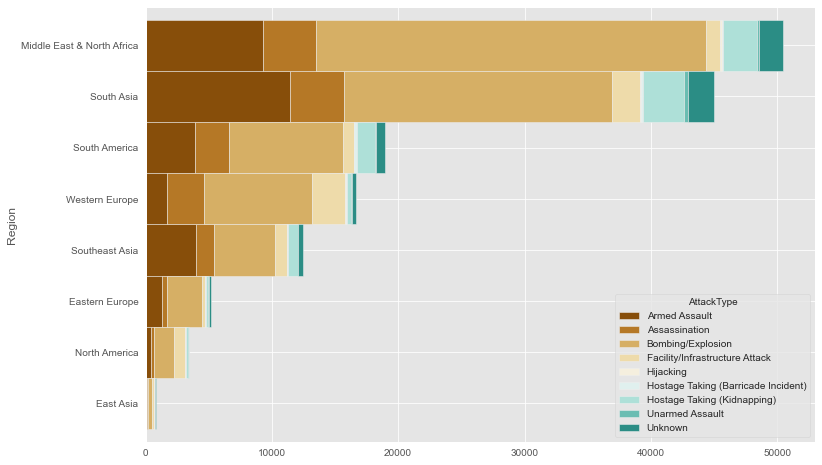

In [260]:
# 지역별 테러 공격형태
colors=sns.color_palette('BrBG',n_colors=10)
anal_region_attack.plot.barh(stacked=True,width=1,color=colors)
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

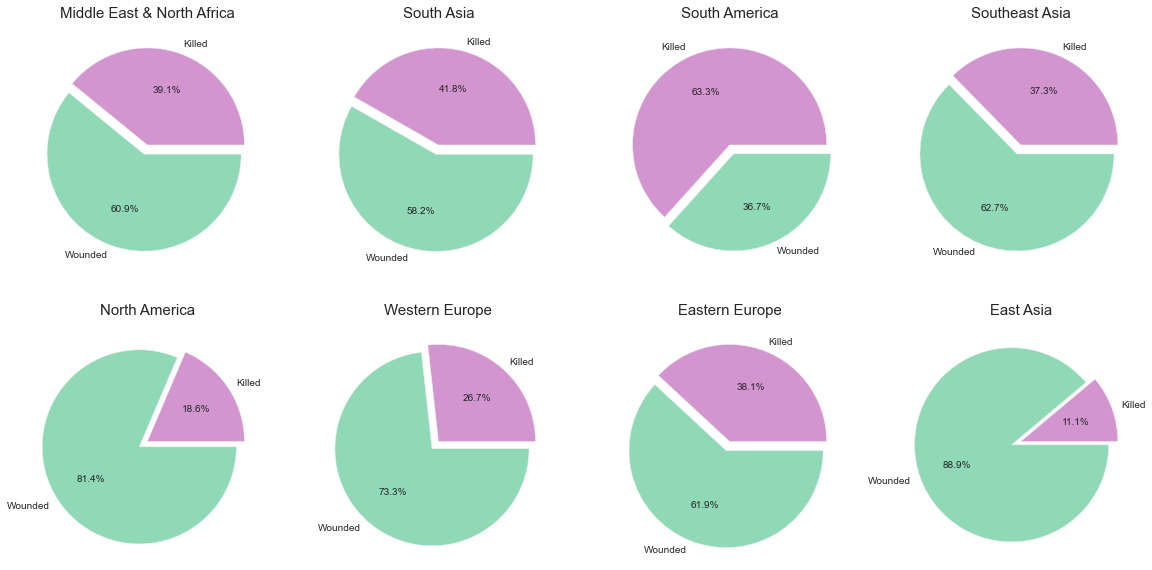

In [159]:
# 지역별 사망자, 부상자 비율

plt.figure(figsize=(20,10))
colors=['darkred','whitesmoke']
explode = [0, 0.10]
colors = ['#d395d0','#8fd9b6']

for i in range(8):
    plt.subplot(2,4,i+1)
    plt.pie([anal_region['Killed'][i],anal_region['Wounded'][i]], explode=explode,labels=['Killed','Wounded'], colors=colors, autopct='%.1f%%')
    plt.title(anal_region.index[i],fontsize=15,)
plt.show()

- 절대적 수치를 보면 중동&북아프리카 지역의 사상자 수가 압도적으로 많으며, 남아시아 지역이 두번째로 사상자 수가 많다.
- 남아메리카 지역은 세번째로 사상자 수가 많은데, 사망자 수가 부상자 수보다 많다. 
- 8개의 지역 구분 중 유일하게 남아메리카만 사망자 수가 부상자 수보다 많다.
- 북미와 서유럽, 동아시아와 같이 상대적으로 선진화된 국가들은 전체 사상자 중 사망자 수가 적은 비중으로 나타난다.


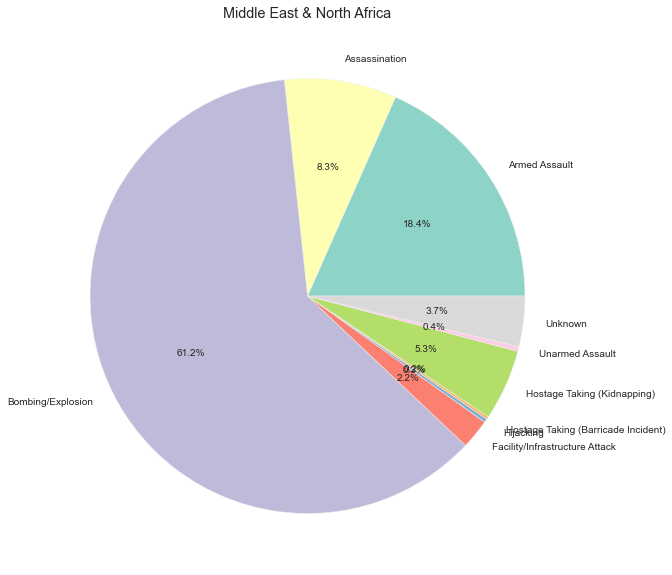

In [180]:
# 지역별 공격형태

X=anal_region_attack.loc['Middle East & North Africa']
D=dict(X)
plt.figure(figsize=(20,10))
# explode = [0, 0.10]
colors = sns.color_palette('Set3')
plt.pie(D.values(),colors=colors,labels=D.keys(),autopct='%.1f%%')
plt.title(anal_region.index[0])
plt.show()

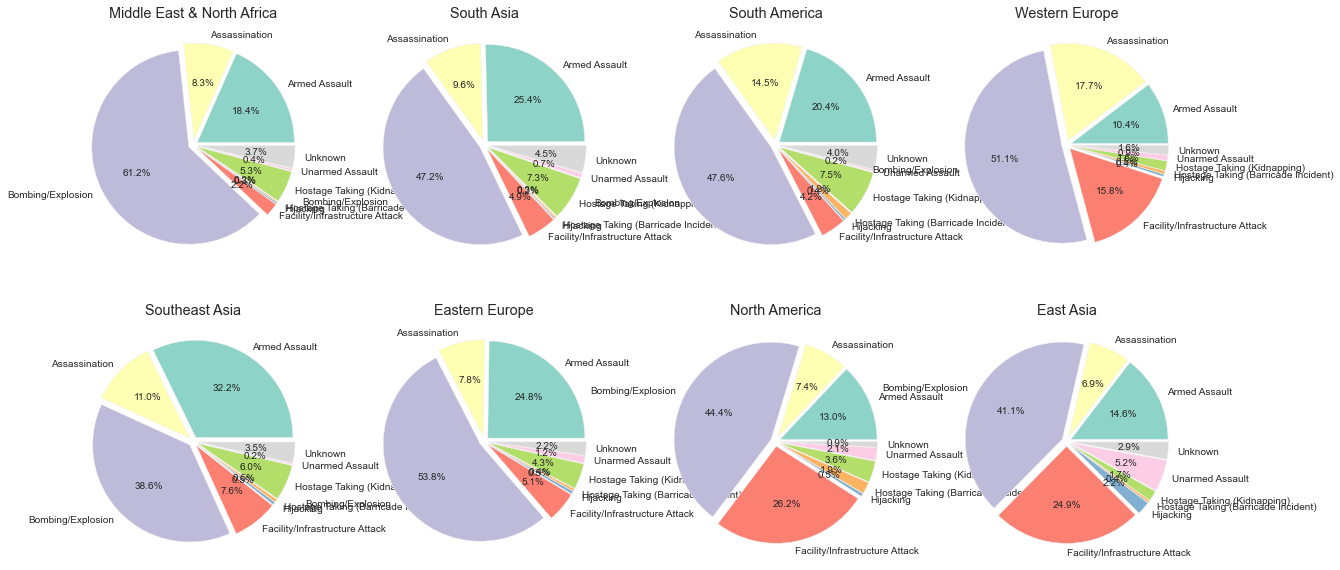

In [187]:
plt.figure(figsize=(20,10))
colors = sns.color_palette('Set3')
i=0
for x in anal_region_attack.index:
    plt.subplot(2,4,i+1)
    X=anal_region_attack.loc[x]
    D=dict(X)
    plt.pie(D.values(),colors=colors,labels=D.keys(),autopct='%.1f%%',explode = [0.05]*9)
    plt.title(x)
    i+=1

plt.show()

- 서유럽, 북미, 동아시아의 특징:
    다른 지역보다 시설,인프라 공격 비중이 높고, 무장공격의 비중이 낮은 편이다. 
- 이것이 앞서 살펴본 사망자 수가 비교적 적은 이유 중 하나일 것이다.

In [163]:
atck_col=anal_region_attack.columns
atck_col

Index(['Armed Assault', 'Assassination', 'Bombing/Explosion',
       'Facility/Infrastructure Attack', 'Hijacking',
       'Hostage Taking (Barricade Incident)', 'Hostage Taking (Kidnapping)',
       'Unarmed Assault', 'Unknown'],
      dtype='object', name='AttackType')

In [ ]:
import matplotlib.pyplot as plt

ratio = [34, 32, 16, 18]
labels = ['Apple', 'Banana', 'Melon', 'Grapes']
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, colors=colors, wedgeprops=wedgeprops)
plt.show()

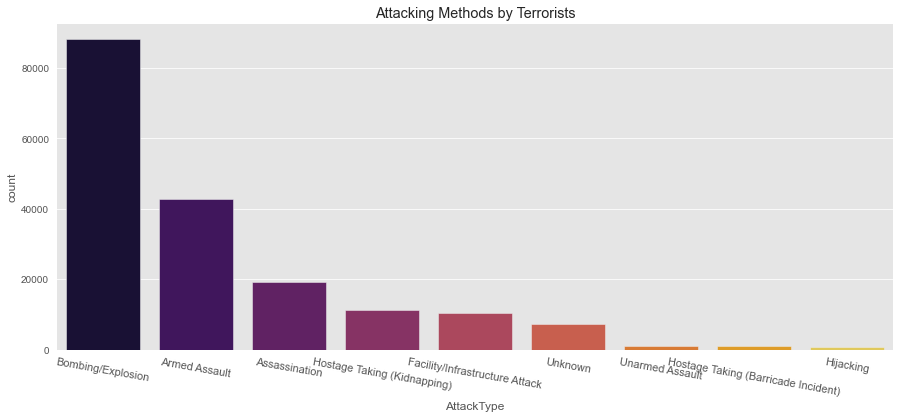

In [421]:
plt.subplots(figsize=(15,6))
sns.countplot('AttackType',data=terror,palette='inferno',order=terror['AttackType'].value_counts().index)
plt.xticks(rotation=350, fontsize=11)
plt.title('Attacking Methods by Terrorists')
plt.show()

In [ ]:
grid=sns.FacetGrid(terror, row='대륙',col='사망자수/부상자수',height=4,aspect=2)
grid.map(plt.hist, 'Year', alpha=.8, bins=10)
grid.add_legend()

---

# 분석 5: 2012년 이후의 지역별 특징

In [242]:
terror['2012']=pd.cut(terror['Year'], bins=[1970,2012,2020], include_lowest=True, labels=['before 2012','after 2012'])
terror.tail(3)

,ID,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,...,Summary,Group,Target_type,Weapon_type,HostKid,Motive,casualities,Region_2,Year_cat,2012
181688,201712310030,2017,12,31,Philippines,Southeast Asia,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,...,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN,NaN,0.0,Southeast Asia,2010,after 2012
181689,201712310031,2017,12,31,India,South Asia,Imphal,24.798346,93.940430,Bombing/Explosion,...,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN,NaN,0.0,South Asia,2010,after 2012
181690,201712310032,2017,12,31,Philippines,Southeast Asia,Cotabato City,7.209594,124.241966,Bombing/Explosion,...,12/31/2017: An explosive device was discovered...,Unknown,Unknown,Explosives,NaN,NaN,0.0,Southeast Asia,2010,after 2012


In [262]:
coun_terror=terror['Country'].value_counts()[:10].to_frame()
coun_terror.columns=['Attacks']
coun_kill=terror.groupby('Country')['Killed'].sum().to_frame()
coun_terror.merge(coun_kill,left_index=True,right_index=True,how='left')

,Attacks,Killed
Iraq,24636,78589.0
Pakistan,14368,23822.0
Afghanistan,12731,39384.0
India,11960,19341.0
Colombia,8306,14698.0
Philippines,6908,9559.0
Peru,6096,12771.0
El Salvador,5320,12053.0
United Kingdom,5235,3410.0
Turkey,4292,6888.0


In [269]:
anal_5_1=terror.pivot_table(index='Region',columns='2012',values=['Killed','Wounded'],aggfunc=np.sum)
anal_5_1=anal_5_1.loc[['Middle East & North Africa','South Asia','South America','Western Europe','Southeast Asia','Eastern Europe','North America','East Asia']]
# anal_region.sort_values(by='casualities',ascending=False,inplace=True)
anal_5_1

Killed                Wounded           
2012                       before 2012 after 2012 before 2012 after 2012
Region                                                                  
Middle East & North Africa     59520.0    78122.0    114629.0    99679.0
South Asia                     62124.0    39195.0     92301.0    49059.0
South America                  28216.0      633.0     15577.0     1127.0
Western Europe                  6190.0      504.0     16281.0     2051.0
Southeast Asia                 12116.0     3521.0     19802.0     6457.0
Eastern Europe                  4794.0     2621.0      8697.0     3348.0
North America                   4552.0      364.0     19752.0     1779.0
East Asia                        599.0      553.0      8459.0      754.0

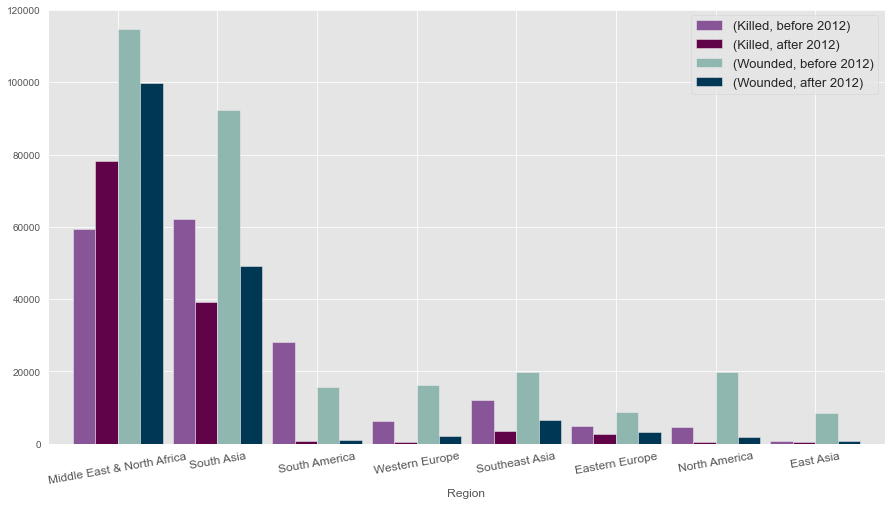

In [413]:
colors=['#885599','#610349','#90b7af','#003754']
anal_5_1.plot.bar(width=0.9,color=colors)
fig=plt.gcf()
fig.set_size_inches(15,8)
plt.xticks(rotation=10, fontsize=12)
plt.legend(fontsize=13)
plt.show()

- 전반적으로 모든 지역에서 사망자 수와 부상자 수 모두 2012년 이후로 감소하는 양상을 보인다.
- 그러나 사상자 수 발생 상위 두 지역을 보면, 중동&북아프리카는 2012년 이후로 사망자 수가 증가한 유일한 지역이다.
- 남아시아 역시 감소하였지만 그 폭이 비교적 큰 편은 아니다.

- 남아메리카 지역이 사망자수와 부상자 수 모두 가장 큰 폭으로 감소하였다.
- 2012년 이후 서유럽과 북미는 사망자수가 현저히 감소하였으며, 부상자수 역시 사망자수보다는 많지만 비교적 적은 편이다.
- 동아시아는 시기와 상관없이 사망자 수가 가장 적은 지역이며, 부상자수도 2012년 이후로 상당히 감소하였다.
- 동유럽은 서유럽과 비교했을 때, 2012년 이전의 사상자 수는 적지만, 2012년 이후의 사상자 수는 더 많다.
- 또한 하위 5지역 중에선 가장 감소폭이 적은 것으로 보인다.
- 남동아시아 지역은 하위 5지역 중 2012년 이후 가장 사상자 수가 많은 것으로 보인다.

- 국가의 경제력이 테러가 발생했을 때 피해를 받는 규모와, 대처 면에서 영향을 끼칠 수 밖에 없을 것이므로, 이러한 결과가 나타난 것으로 예상해볼 수 있다.

In [294]:
anal_5_2=terror.pivot_table(index='Region',columns=['2012','AttackType'],values='ID',aggfunc=np.count_nonzero)
anal_5_2=anal_5_2.loc[['Middle East & North Africa','South Asia','South America','Western Europe','Southeast Asia','Eastern Europe','North America','East Asia']]
anal_5_2['Total']=anal_5_2.sum(axis=1)
anal_5_2.sort_values(by='Total',inplace=True)
anal_5_2

2012                         before 2012                                  \
AttackType                 Armed Assault Assassination Bombing/Explosion   
Region                                                                     
East Asia                           83.0          52.0             287.0   
North America                      352.0         226.0            1486.0   
Eastern Europe                     754.0         334.0            1668.0   
Southeast Asia                    2331.0         741.0            2690.0   
Western Europe                    1487.0        2914.0            7986.0   
South America                     3691.0        2682.0            8604.0   
South Asia                        6347.0        2704.0           10933.0   
Middle East & North Africa        5061.0        2973.0           12863.0   

2012                                                                 \
AttackType                 Facility/Infrastructure Attack Hijacking   
Region                                                                
East Asia                                           187.0      17.0   
North America                                       802.0      17.0   
Eastern Europe                                      118.0      25.0   
Southeast Asia                                      486.0      24.0   
Western Europe                                     2129.0      59.0   
South America                                       694.0      66.0   
South Asia                                         1003.0      70.0   
Middle East & North Africa                          577.0      82.0   

2012                                                            \
AttackType                 Hostage Taking (Barricade Incident)   
Region                                                           
East Asia                                                  2.0   
North America                                             62.0   
Eastern Europe                                            10.0   
Southeast Asia                                            27.0   
Western Europe                                            77.0   
South America                                            225.0   
South Asia                                                34.0   
Middle East & North Africa                                42.0   

2012                                                                    \
AttackType                 Hostage Taking (Kidnapping) Unarmed Assault   
Region                                                                   
East Asia                                         13.0            39.0   
North America                                    116.0            60.0   
Eastern Europe                                    96.0            41.0   
Southeast Asia                                   414.0            19.0   
Western Europe                                   262.0            98.0   
South America                                   1292.0            45.0   
South Asia                                      1609.0           181.0   
Middle East & North Africa                       909.0            93.0   

2012                                  after 2012                \
AttackType                 Unknown Armed Assault Assassination   
Region                                                           
East Asia                     21.0          34.0           3.0   
North America                 32.0          96.0          29.0   
Eastern Europe                43.0         520.0          66.0   
Southeast Asia               314.0        1691.0         628.0   
Western Europe               254.0         237.0          24.0   
South America                707.0         184.0          63.0   
South Asia                   829.0        5057.0        1597.0   
Middle East & North Africa   444.0        4212.0        1233.0   

2012                                                                         \
AttackType                 Bombin

In [295]:
before2012=anal_5_2.iloc[:,:9]
before2012

2012                         before 2012                                  \
AttackType                 Armed Assault Assassination Bombing/Explosion   
Region                                                                     
East Asia                           83.0          52.0             287.0   
North America                      352.0         226.0            1486.0   
Eastern Europe                     754.0         334.0            1668.0   
Southeast Asia                    2331.0         741.0            2690.0   
Western Europe                    1487.0        2914.0            7986.0   
South America                     3691.0        2682.0            8604.0   
South Asia                        6347.0        2704.0           10933.0   
Middle East & North Africa        5061.0        2973.0           12863.0   

2012                                                                 \
AttackType                 Facility/Infrastructure Attack Hijacking   
Region                                                                
East Asia                                           187.0      17.0   
North America                                       802.0      17.0   
Eastern Europe                                      118.0      25.0   
Southeast Asia                                      486.0      24.0   
Western Europe                                     2129.0      59.0   
South America                                       694.0      66.0   
South Asia                                         1003.0      70.0   
Middle East & North Africa                          577.0      82.0   

2012                                                            \
AttackType                 Hostage Taking (Barricade Incident)   
Region                                                           
East Asia                                                  2.0   
North America                                             62.0   
Eastern Europe                                            10.0   
Southeast Asia                                            27.0   
Western Europe                                            77.0   
South America                                            225.0   
South Asia                                                34.0   
Middle East & North Africa                                42.0   

2012                                                                            
AttackType                 Hostage Taking (Kidnapping) Unarmed Assault Unknown  
Region                                                                          
East Asia                                         13.0            39.0    21.0  
North America                                    116.0            60.0    32.0  
Eastern Europe                                    96.0            41.0    43.0  
Southeast Asia                                   414.0            19.0   314.0  
Western Europe                                   262.0            98.0   254.0  
South America                                   1292.0            45.0   707.0  
South Asia                                      1609.0           181.0   829.0  
Middle East & North Africa                       909.0            93.0   444.0

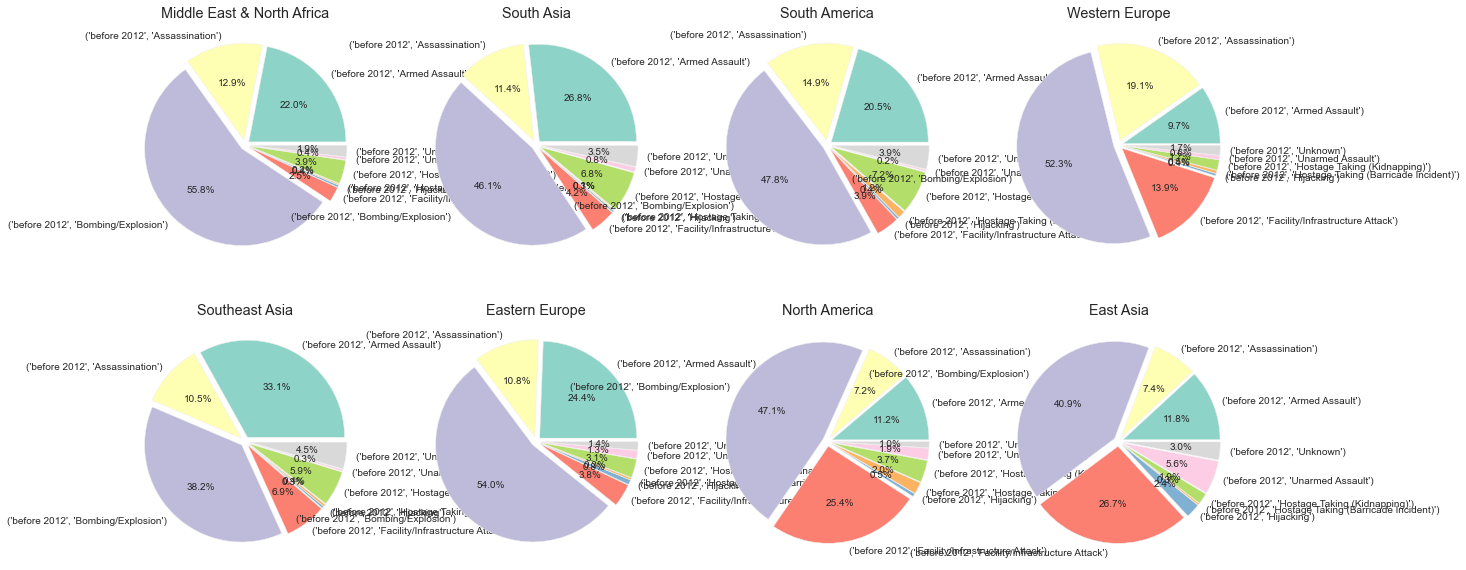

In [290]:
plt.figure(figsize=(20,10))
colors = sns.color_palette('Set3')
i=0
for x in before2012.index:
    plt.subplot(2,4,i+1)
    X=before2012.loc[x]
    D=dict(X)
    plt.pie(D.values(),colors=colors,labels=D.keys(),autopct='%.1f%%',explode = [0.05]*9)
    plt.title(x)
    i+=1

plt.show()

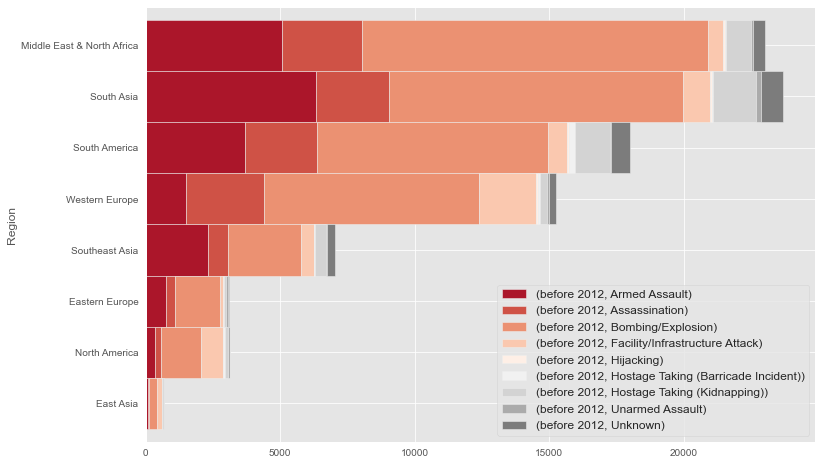

In [439]:
colors=sns.color_palette('RdGy',n_colors=10)
before2012.plot.barh(stacked=True,width=1,color=colors)
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.legend(fontsize=12)
plt.show()

In [296]:
after2012=anal_5_2.iloc[:,9:-1]
after2012

2012                          after 2012                                  \
AttackType                 Armed Assault Assassination Bombing/Explosion   
Region                                                                     
East Asia                           34.0           3.0              43.0   
North America                       96.0          29.0              48.0   
Eastern Europe                     520.0          66.0            1098.0   
Southeast Asia                    1691.0         628.0            2128.0   
Western Europe                     237.0          24.0             522.0   
South America                      184.0          63.0             435.0   
South Asia                        5057.0        1597.0           10313.0   
Middle East & North Africa        4212.0        1233.0           18045.0   

2012                                                                 \
AttackType                 Facility/Infrastructure Attack Hijacking   
Region                                                                
East Asia                                            13.0       1.0   
North America                                       104.0       1.0   
Eastern Europe                                      142.0       1.0   
Southeast Asia                                      462.0      35.0   
Western Europe                                      502.0       8.0   
South America                                       109.0       1.0   
South Asia                                         1186.0      23.0   
Middle East & North Africa                          538.0      56.0   

2012                                                            \
AttackType                 Hostage Taking (Barricade Incident)   
Region                                                           
East Asia                                                  1.0   
North America                                              5.0   
Eastern Europe                                            11.0   
Southeast Asia                                            40.0   
Western Europe                                            12.0   
South America                                              9.0   
South Asia                                                86.0   
Middle East & North Africa                                58.0   

2012                                                                            
AttackType                 Hostage Taking (Kidnapping) Unarmed Assault Unknown  
Region                                                                          
East Asia                                          1.0             3.0     2.0  
North America                                      7.0            13.0     NaN  
Eastern Europe                                   124.0            21.0    72.0  
Southeast Asia                                   330.0             6.0   119.0  
Western Europe                                     7.0            50.0    11.0  
South America                                    122.0             2.0    47.0  
South Asia                                      1668.0           142.0  1192.0  
Middle East & North Africa                      1757.0            84.0  1447.0

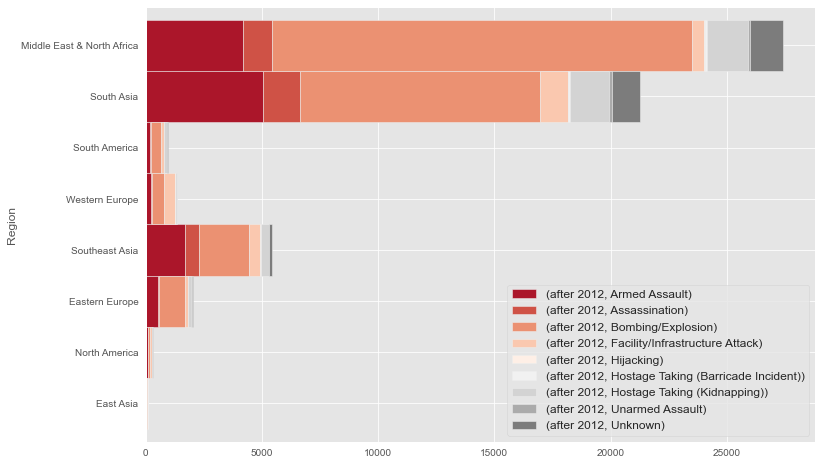

In [438]:
colors=sns.color_palette('RdGy',n_colors=10)
after2012.plot.barh(stacked=True,width=1,color=colors)
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.legend(fontsize=12)
plt.show()

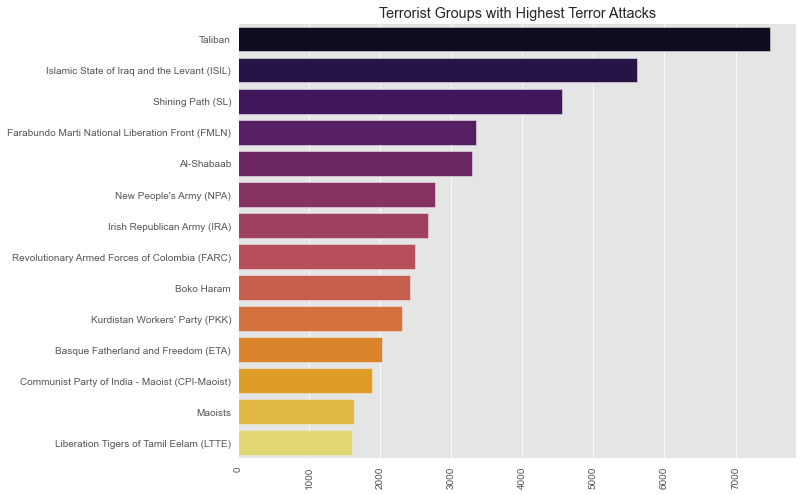

In [248]:
# 테러 집단 순위
sns.barplot(terror['Group'].value_counts()[1:15].values,terror['Group'].value_counts()[1:15].index,palette=('inferno'))
plt.xticks(rotation=90)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

---

# 분석 6: 시기별(10년단위) 지역별 특성
- 공격타입
- 무기타입
- 사상자
- 타겟

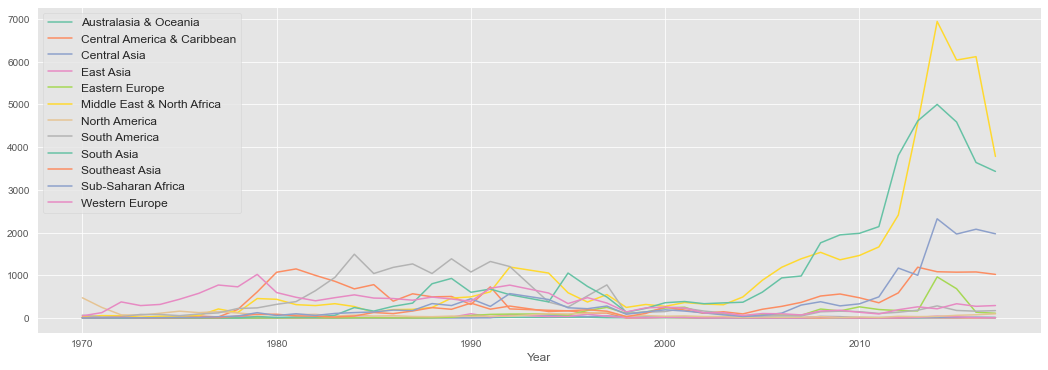

In [432]:
# 지역별 테러 발생 변화 추이
terror_region=pd.crosstab(terror.Year,terror.Region)
terror_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.legend(fontsize=12)
plt.show()

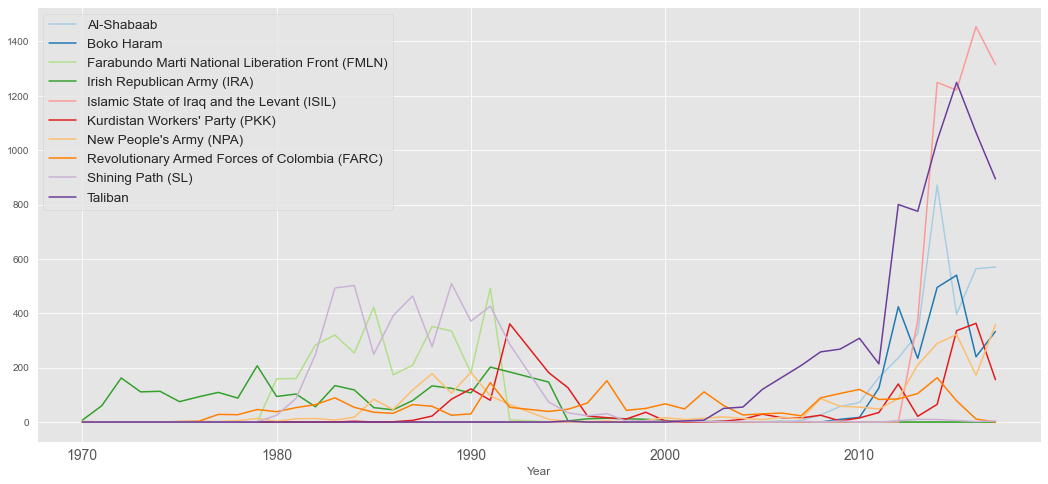

In [443]:
# 테러 집단의 변화 양상
top_groups10=terror[terror['Group'].isin(terror['Group'].value_counts()[1:11].index)]
pd.crosstab(top_groups10.Year,top_groups10.Group).plot(color=sns.color_palette('Paired',10))
fig=plt.gcf()
fig.set_size_inches(18,8)
plt.xticks(fontsize=14)
plt.legend(fontsize=13.5)
plt.show()

- 2000년대 이전에는 사회주의 세력의 테러 활동 비중이 높았음 (FMLN, PKK, NPA, FARC, SL)
- 2010년대부터 이슬람 무장세력의 테러 활동이 급격히 증가함 (Taliban, IS, Al-Shabaab, Boko Haram)
- 대부분 앞서 살펴본 상위 10개국의 나라와 관련있는 단체들이라 왜 그 나라들에서 테러가 많이 발생했는지에 대한 의문을 해결해 줄 수 있는 자료.
    - IRA => 영국
    - FARC => 콜롬비아
    - SL => 페루
    - NPA => 필리핀
    - FMLN => 나이지리아
    - PKK => 터키

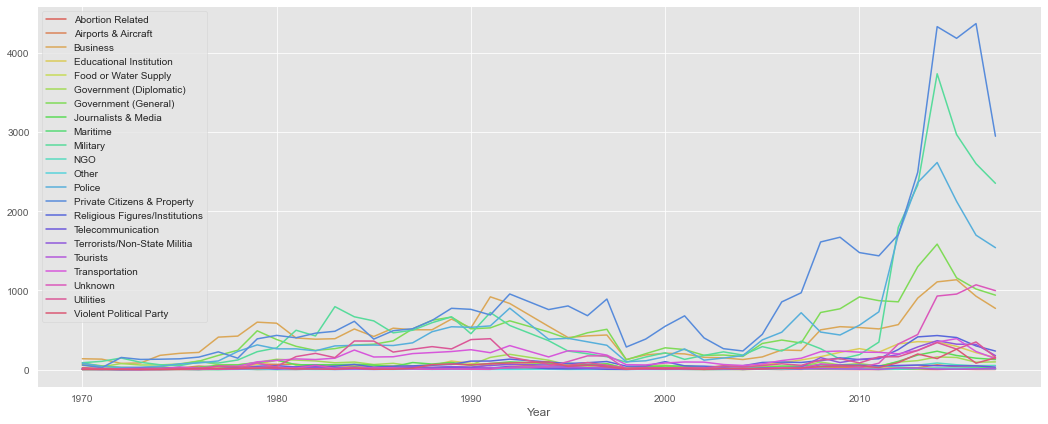

In [448]:
# 타겟의 변화 양상
pd.crosstab(terror['Year'],terror['Target_type']).plot(color=sns.color_palette('hls',22))
fig=plt.gcf()
fig.set_size_inches(18,7)
plt.legend(loc='upper left')
plt.show()

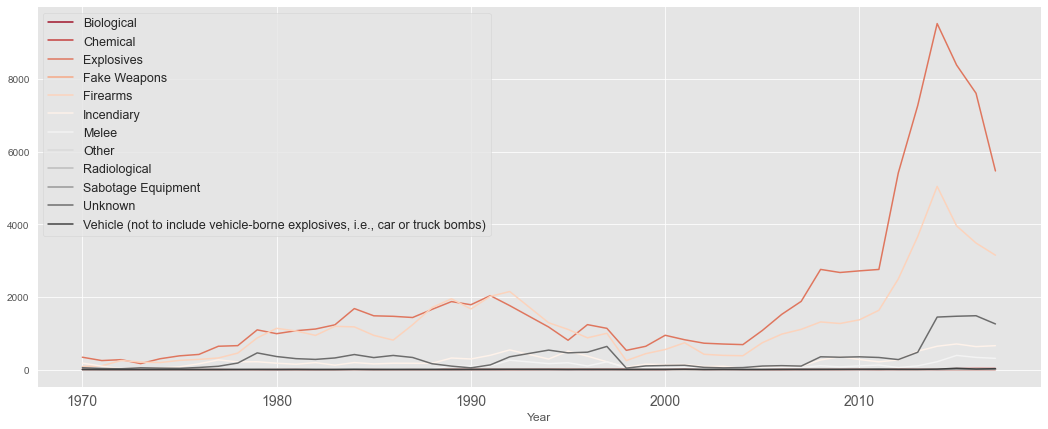

In [457]:
# 공격형태의 변화 양상
pd.crosstab(terror['Year'],terror['Weapon_type']).plot(color=sns.color_palette('RdGy',12))
fig=plt.gcf()
fig.set_size_inches(18,7)
plt.legend(loc='upper left')
plt.xticks(fontsize=14)
plt.legend(fontsize=12.5)
plt.show()

In [ ]:
# 공격형태의 변화 양상(수치 적은 것끼리 재비교)
# pd.crosstab(terror['Year'],terror['Weapon_type']).plot(color=sns.color_palette('RdGy',12))
# fig=plt.gcf()
# fig.set_size_inches(18,7)
# plt.legend(loc='upper left')
# plt.show()

In [233]:
terror['Year_cat']=pd.cut(terror['Year'], bins=[1970,1980,1990,2000,2010,2020], include_lowest=True, labels=['1970','1980','1990','2000','2010'])
terror.head(3)

,ID,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,...,Target,Summary,Group,Target_type,Weapon_type,HostKid,Motive,casualities,Region_2,Year_cat
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,...,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,NaN,1.0,Central America & Caribbean,1970
1,197000000002,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),...,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,1.0,NaN,0.0,North America,1970
2,197001000001,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,...,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,NaN,1.0,Southeast Asia,1970


In [333]:
# 남미빼고??
anal_6_1=terror.pivot_table(index='Region',columns='Year_cat',values=['casualities'],aggfunc=np.sum)
anal_6_1=anal_6_1.loc[['Middle East & North Africa','South Asia','South America','Western Europe','Southeast Asia','Eastern Europe','North America','East Asia']]
# anal_region.sort_values(by='casualities',ascending=False,inplace=True)
anal_6_1

casualities                                     
Year_cat                          1970     1980     1990     2000      2010
Region                                                                     
Middle East & North Africa      4997.0  15994.0  26565.0  98172.0  184079.0
South Asia                       347.0  24513.0  37415.0  62018.0  110073.0
South America                   1182.0  22670.0  12688.0   4514.0    2508.0
Western Europe                  4955.0   7191.0   3941.0   3931.0    2760.0
Southeast Asia                  2325.0   7321.0   7479.0  11004.0   12712.0
Eastern Europe                    55.0    270.0   4303.0   6933.0    6678.0
North America                    947.0   1362.0   2038.0  19866.0    2185.0
East Asia                         28.0    301.0   7798.0    504.0    1372.0

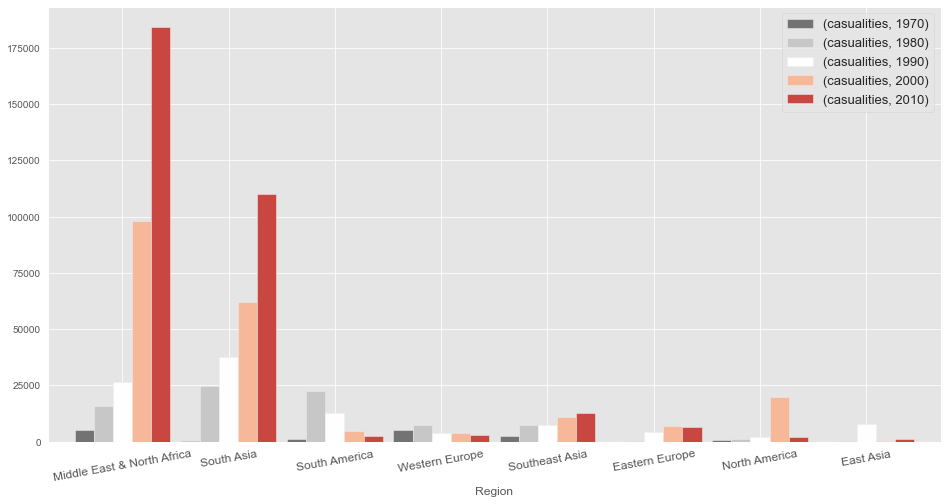

In [465]:
# 10년 단위 지역별 사상자
colors=sns.color_palette('RdGy_r',n_colors=5)
anal_6_1.plot.bar(width=0.9,color=colors)
fig=plt.gcf()
fig.set_size_inches(16,8)
plt.legend(fontsize=13)
plt.xticks(rotation=10, fontsize=12)
plt.show()

In [246]:
anal_6_2=terror.pivot_table(index='Region',columns=['AttackType','Year_cat'],values='ID',aggfunc=np.count_nonzero)
anal_6_2=anal_6_2.loc[['Middle East & North Africa','South Asia','South America','Western Europe','Southeast Asia','Eastern Europe','North America','East Asia']]
# anal_region_attack['Total']=anal_region_attack.sum(axis=1)
# anal_region_attack.sort_values(by='Total',inplace=True)
anal_6_2

AttackType                 Armed Assault                                  \
Year_cat                            1970    1980    1990    2000    2010   
Region                                                                     
Middle East & North Africa         174.0   537.0  1582.0  1886.0  5094.0   
South Asia                          15.0   969.0  1441.0  2447.0  6532.0   
South America                      240.0  2238.0   994.0   184.0   219.0   
Western Europe                     731.0   261.0   367.0   104.0   261.0   
Southeast Asia                      70.0   329.0   404.0  1196.0  2023.0   
Eastern Europe                       1.0    17.0   262.0   363.0   631.0   
North America                      170.0    17.0   127.0    28.0   106.0   
East Asia                            9.0    24.0    37.0    10.0    37.0   

AttackType                 Assassination                                 ...  \
Year_cat                            1970    1980    1990   2000    2010  ...   
Region                                                                   ...   
Middle East & North Africa         318.0   620.0  1111.0  620.0  1537.0  ...   
South Asia                          14.0   959.0   886.0  553.0  1889.0  ...   
South America                      224.0  1669.0   697.0   86.0    69.0  ...   
Western Europe                    1419.0  1008.0   460.0   25.0    26.0  ...   
Southeast Asia                      35.0   334.0   163.0  158.0   679.0  ...   
Eastern Europe                       1.0    16.0   164.0  118.0   101.0  ...   
North America                       84.0    45.0    91.0    5.0    30.0  ...   
East Asia                            5.0     8.0    38.0    1.0     3.0  ...   

AttackType                 Unarmed Assault                          Unknown  \
Year_cat                              1970  1980  1990  2000   2010    1970   
Region                                                                        
Middle East & North Africa             1.0  10.0  64.0  13.0   89.0    35.0   
South Asia                             1.0   4.0  98.0  47.0  173.0     2.0   
South America                          1.0   6.0  33.0   5.0    2.0    55.0   
Western Europe                        13.0  15.0  42.0  25.0   53.0    53.0   
Southeast Asia                         NaN   1.0   7.0  10.0    7.0    22.0   
Eastern Europe                         NaN   NaN  14.0  25.0   23.0     NaN   
North America                          6.0   7.0  25.0  20.0   15.0     6.0   
East Asia                              2.0   4.0  29.0   3.0    4.0     2.0   

AttackType                                               
Year_cat                     1980   1990   2000    2010  
Region                                                   
Middle East & North Africa   45.0  214.0  106.0  1491.0  
South Asia                  109.0  305.0  246.0  1359.0  
South America               334.0  282.0   28.0    55.0  
Western Europe               74.0  126.0    1.0    11.0  
Southeast Asia              114.0  116.0   48.0   133.0  
Eastern Europe                2.0   26.0   13.0    74.0  
North America                 6.0   19.0    1.0     NaN  
East Asia                     3.0   16.0    NaN     2.0  

[8 rows x 45 columns]

In [479]:
temp=anal_6_2.iloc[:,:5]
temp

AttackType                 Armed Assault                                
Year_cat                            1970    1980    1990    2000    2010
Region                                                                  
Middle East & North Africa         174.0   537.0  1582.0  1886.0  5094.0
South Asia                          15.0   969.0  1441.0  2447.0  6532.0
South America                      240.0  2238.0   994.0   184.0   219.0
Western Europe                     731.0   261.0   367.0   104.0   261.0
Southeast Asia                      70.0   329.0   404.0  1196.0  2023.0
Eastern Europe                       1.0    17.0   262.0   363.0   631.0
North America                      170.0    17.0   127.0    28.0   106.0
East Asia                            9.0    24.0    37.0    10.0    37.0

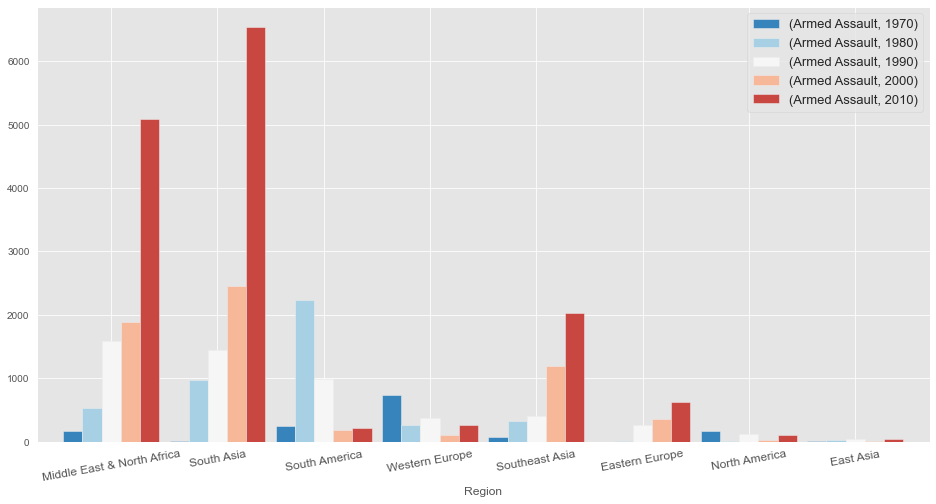

In [480]:
# 10년 단위 지역별 무장공격 테러 발생 추이
colors=sns.color_palette('RdBu_r',n_colors=5)
temp.plot.bar(width=0.9,color=colors)
fig=plt.gcf()
fig.set_size_inches(16,8)
plt.xticks(rotation=10, fontsize=12)
plt.legend(fontsize=13)
plt.show()

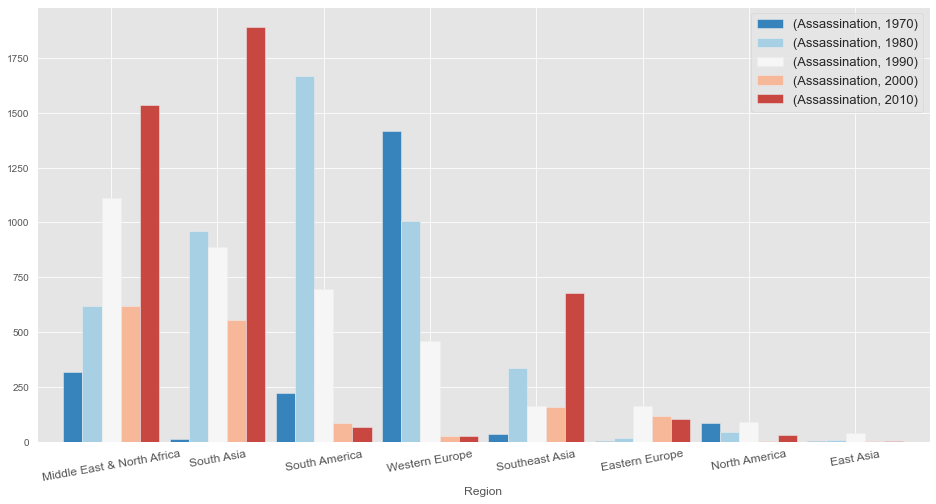

In [478]:
# 10년 단위 지역별 암살 테러 발생 추이
colors=sns.color_palette('RdBu_r',n_colors=5)
temp.plot.bar(width=0.9,color=colors)
fig=plt.gcf()
fig.set_size_inches(16,8)
plt.xticks(rotation=10, fontsize=12)
plt.legend(fontsize=13)
plt.show()

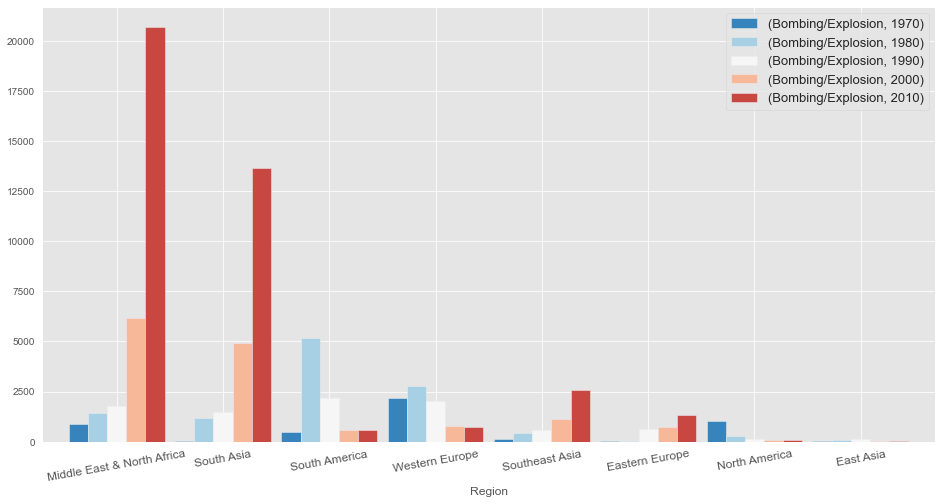

In [476]:
# 10년 단위 지역별 폭탄테러 발생 추이
colors=sns.color_palette('RdBu_r',n_colors=5)
temp.plot.bar(width=0.9,color=colors)
fig=plt.gcf()
fig.set_size_inches(16,8)
plt.xticks(rotation=10, fontsize=12)
plt.legend(fontsize=13)
plt.show()

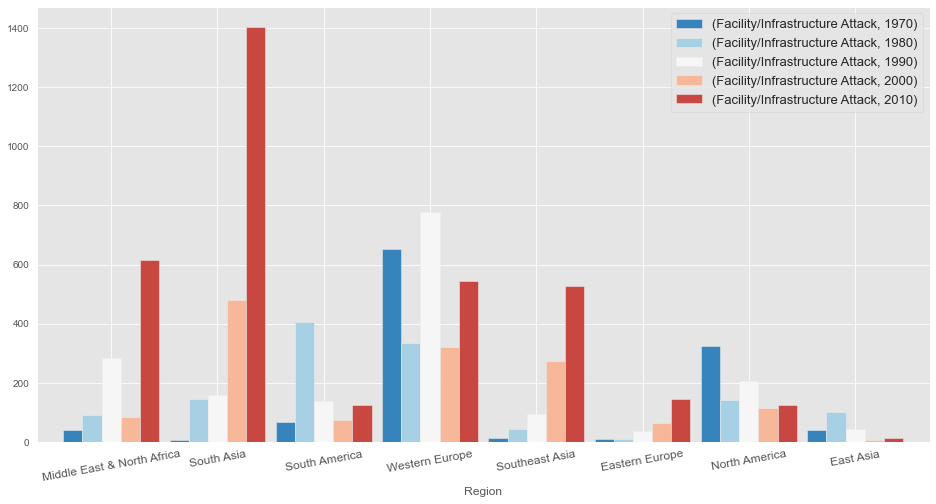

In [474]:
# 10년 단위 지역별 시설공격 테러발생 추이

colors=sns.color_palette('RdBu_r',n_colors=5)
temp.plot.bar(width=0.9,color=colors)
fig=plt.gcf()
fig.set_size_inches(16,8)
plt.xticks(rotation=10, fontsize=12)
plt.legend(fontsize=13)
plt.show()

In [370]:
terror['Weapon_type'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

In [371]:
anal_6_3=terror.pivot_table(index='Region',columns=['Weapon_type'],values='ID',aggfunc=np.count_nonzero)
anal_6_3=anal_6_3.loc[['Middle East & North Africa','South Asia','South America','Western Europe','Southeast Asia','Eastern Europe','North America','East Asia']]
# anal_region_attack['Total']=anal_region_attack.sum(axis=1)
# anal_region_attack.sort_values(by='Total',inplace=True)
anal_6_3

Weapon_type,Biological,Chemical,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Radiological,Sabotage Equipment,Unknown,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
Region,,,,,,,,,,,,
Middle East & North Africa,1.0,73.0,32283.0,6.0,11877.0,1181.0,1227.0,23.0,NaN,10.0,3724.0,69.0
South Asia,2.0,83.0,22568.0,3.0,15169.0,2285.0,998.0,16.0,1.0,46.0,3788.0,15.0
South America,1.0,26.0,9098.0,3.0,6525.0,1077.0,131.0,6.0,NaN,15.0,2093.0,3.0
Western Europe,2.0,46.0,8657.0,6.0,3651.0,3056.0,339.0,20.0,2.0,11.0,830.0,19.0
Southeast Asia,NaN,11.0,5039.0,NaN,5634.0,837.0,147.0,4.0,NaN,21.0,792.0,NaN
Eastern Europe,NaN,12.0,3089.0,4.0,1461.0,186.0,90.0,4.0,NaN,4.0,293.0,1.0
North America,24.0,26.0,1557.0,5.0,682.0,897.0,74.0,18.0,1.0,19.0,138.0,15.0
East Asia,2.0,17.0,333.0,4.0,41.0,252.0,82.0,3.0,10.0,3.0,47.0,8.0


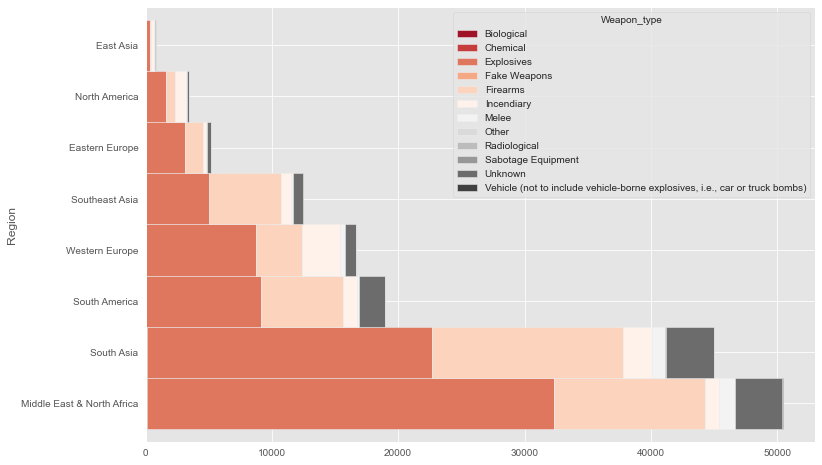

In [379]:
colors=sns.color_palette('RdGy',n_colors=12)
anal_6_3.plot.barh(stacked=True,width=1,color=colors)
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

In [367]:
anal_6_3=terror.pivot_table(index='Region',columns=['Weapon_type','Year_cat'],values='ID',aggfunc=np.count_nonzero)
anal_6_3=anal_6_3.loc[['Middle East & North Africa','South Asia','South America','Western Europe','Southeast Asia','Eastern Europe','North America','East Asia']]
# anal_region_attack['Total']=anal_region_attack.sum(axis=1)
# anal_region_attack.sort_values(by='Total',inplace=True)
anal_6_3

Weapon_type                Biological                 Chemical             \
Year_cat                         1980 1990  2000 2010     1970 1980  1990   
Region                                                                      
Middle East & North Africa        NaN  1.0   NaN  NaN      2.0  4.0   7.0   
South Asia                        NaN  NaN   1.0  1.0      NaN  4.0   4.0   
South America                     NaN  NaN   1.0  NaN      2.0  3.0  12.0   
Western Europe                    2.0  NaN   NaN  NaN     19.0  4.0   9.0   
Southeast Asia                    NaN  NaN   NaN  NaN      NaN  1.0   2.0   
Eastern Europe                    NaN  NaN   NaN  NaN      NaN  NaN   4.0   
North America                     4.0  NaN  17.0  3.0     11.0  2.0   7.0   
East Asia                         2.0  NaN   NaN  NaN      NaN  2.0  11.0   

Weapon_type                            Explosives  ... Unknown                \
Year_cat                    2000  2010       1970  ...    1970   1980   1990   
Region                                             ...                         
Middle East & North Africa  10.0  50.0      909.0  ...   137.0  269.0  468.0   
South Asia                  19.0  56.0       20.0  ...     7.0  305.0  539.0   
South America                6.0   3.0      523.0  ...   302.0  891.0  633.0   
Western Europe              13.0   1.0     2248.0  ...   268.0  340.0  187.0   
Southeast Asia               6.0   2.0      119.0  ...    51.0  207.0  208.0   
Eastern Europe               5.0   3.0       16.0  ...     1.0    5.0   83.0   
North America                1.0   5.0     1032.0  ...    54.0   22.0   57.0   
East Asia                    3.0   1.0       23.0  ...     2.0    9.0   34.0   

Weapon_type                                \
Year_cat                     2000    2010   
Region                                      
Middle East & North Africa  240.0  2610.0   
South Asia                  767.0  2170.0   
South America               126.0   141.0   
Western Europe                6.0    29.0   
Southeast Asia               92.0   234.0   
Eastern Europe               34.0   170.0   
North America                 3.0     2.0   
East Asia                     NaN     2.0   

Weapon_type                Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)  \
Year_cat                                                                                          1970   
Region                                                                                                   
Middle East & North Africa                                                NaN                            
South Asia                                                                1.0                            
South America                                                             NaN                            
Western Europe                                                            NaN                            
Southeast Asia                                                            NaN                            
Eastern Europe                                                            NaN                            
North America                                                             NaN                            
East Asia                                                                 1.0                            

Weapon_type                                      
Year_cat                   1980 1990 2000  2010  
Region                                           
Middle East & North Africa  1.0  5.0  4.0  59.0  
South Asia                  4.0  NaN  1.0   9.0  
South America               2.0  1.0  NaN   NaN  
Western Europe              1.0  1.0  3.0  14.0  
Southeast Asia              NaN  NaN  NaN   NaN  
Eastern Europe              NaN  1.0  NaN   NaN  
North America               NaN  2.0  9.0   4.0  
East Asia                   NaN  4.0  NaN   3.0  

[8 rows x 58 columns]

In [350]:
anal_6_5=terror.pivot_table(index='Year_cat',columns=['Group'],values='ID',aggfunc=np.count_nonzero,margins=True)
anal_6_5.loc[anal_6_5['All']>=10]

Group,1 May,14 K Triad,14 March Coalition,14th of December Command,15th of September Liberation Legion,16 January Organization for the Liberation of Tripoli,1920 Revolution Brigades,19th of July Christian Resistance Brigade,1st of May Group,2 April Group,...,Zintani Militia,Zionist Resistance Fighters,Zomi Revolutionary Army (ZRA),Zulu Militants,Zulu Miners,Zuwar al-Imam Rida,Zviadists,Zwai Tribe,leftist guerrillas-Bolivarian militia,All
Year_cat,,,,,,,,,,,,,,,,,,,,,
1970,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12576
1980,4.0,NaN,NaN,3.0,NaN,24.0,NaN,1.0,NaN,6.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,32385
1990,6.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,26689
2000,NaN,NaN,1.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28052
2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,2.0,NaN,NaN,1.0,NaN,1.0,NaN,81989
All,10.0,4.0,1.0,3.0,1.0,24.0,2.0,1.0,4.0,6.0,...,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,181691


In [352]:
anal_6_4=terror.pivot_table(index='Group',columns=['Year_cat','Region',],values='ID',aggfunc=np.count_nonzero,margins=True)
anal_6_4=anal_6_4.loc[anal_6_4['All']>=10]

# anal_6_4=anal_6_4.loc[['Middle East & North Africa','South Asia','South America','Western Europe','Southeast Asia','Eastern Europe','North America','East Asia']]
# anal_region_attack['Total']=anal_region_attack.sum(axis=1)
# anal_region_attack.sort_values(by='Total',inplace=True)
anal_6_4

Year_cat                                                            1970  \
Region                                             Australasia & Oceania   
Group                                                                      
1 May                                                                NaN   
16 January Organization for the Liberation of T...                   NaN   
20 December Movement (M-20)                                          NaN   
23rd of September Communist League                                   NaN   
2nd of June Movement                                                 NaN   
...                                                                  ...   
Zebra killers                                                        NaN   
Zeliangrong United Front                                             NaN   
Zimbabwe African Nationalist Union (ZANU)                            NaN   
Zimbabwe African People's Union                                      NaN   
All                                                                 23.0   

Year_cat                                                                        \
Region                                             Central America & Caribbean   
Group                                                                            
1 May                                                                      NaN   
16 January Organization for the Liberation of T...                         NaN   
20 December Movement (M-20)                                                NaN   
23rd of September Communist League                                         NaN   
2nd of June Movement                                                       NaN   
...                                                                        ...   
Zebra killers                                                              NaN   
Zeliangrong United Front                                                   NaN   
Zimbabwe African Nationalist Union (ZANU)                                  NaN   
Zimbabwe African People's Union                                            NaN   
All                                                                     1988.0   

Year_cat                                                                     \
Region                                             East Asia Eastern Europe   
Group                                                                         
1 May                                                    NaN            NaN   
16 January Organization for the Liberation of T...       NaN            NaN   
20 December Movement (M-20)                              NaN            NaN   
23rd of September Communist League                       NaN            NaN   
2nd of June Movement                                     NaN            1.0   
...                                                      ...            ...   
Zebra killers                                            NaN            NaN   
Zeliangrong United Front                                 NaN            NaN   
Zimbabwe African Nationalist Union (ZANU)                NaN            NaN   
Zimbabwe African People's Union                          NaN            NaN   
All                                                     79.0           27.0   

Year_cat                                                                       \
Region                                             Middle East & North Africa   
Group                                                                           
1 May                                                                     NaN   
16 January Organization for the Liberation of T...                        NaN   
20 December Movement (M-20)                                               NaN   
23rd of September Communist League                                        NaN   
2nd of June Movement                                                      NaN   
...                            

# 문제 7: 테러의 어두운 면 강조

- 타겟에 주목: 민간인 사상자

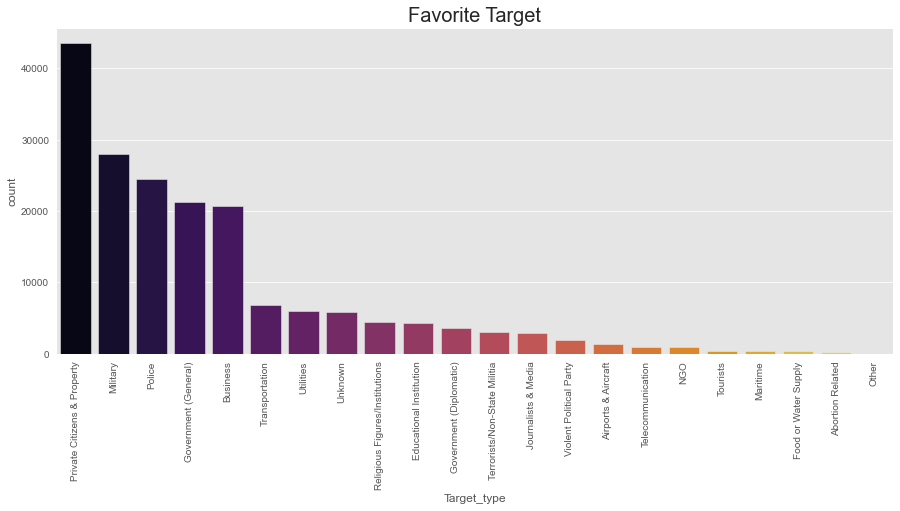

In [311]:
plt.subplots(figsize=(15,6))
sns.countplot(terror['Target_type'],palette='inferno',order=terror['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Favorite Target',fontsize=20)
plt.show()

In [312]:
terror.head(3)

,ID,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,...,Summary,Group,Target_type,Weapon_type,HostKid,Motive,casualities,Region_2,Year_cat,2012
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,...,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,NaN,1.0,Central America & Caribbean,1970,before 2012
1,197000000002,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),...,NaN,23rd of September Communist League,Government (Diplomatic),Unknown,1.0,NaN,0.0,North America,1970,before 2012
2,197001000001,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,...,NaN,Unknown,Journalists & Media,Unknown,NaN,NaN,1.0,Southeast Asia,1970,before 2012


In [316]:
pd.crosstab(terror['Region'],terror['HostKid'])

HostKid,-99.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,...,1300.0,1500.0,1686.0,2000.0,3000.0,4000.0,5000.0,5350.0,10000.0,17000.0
Region,,,,,,,,,,,,,,,,,,,,,
Australasia & Oceania,1,0,7,5,0,0,3,2,0,0,...,0,0,0,0,0,0,0,0,0,0
Central America & Caribbean,275,0,333,68,28,23,16,12,5,8,...,0,0,0,0,0,0,2,0,1,1
Central Asia,5,0,11,10,4,6,2,2,3,0,...,0,0,0,0,0,0,0,0,0,0
East Asia,7,0,7,4,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Eastern Europe,20,0,116,46,20,10,12,5,3,2,...,0,0,0,2,0,0,0,0,0,0
Middle East & North Africa,197,0,1198,370,254,158,104,79,57,33,...,0,1,1,1,1,0,0,1,0,0
North America,19,0,99,13,8,4,4,5,1,0,...,0,0,0,0,0,0,0,0,0,0
South America,286,0,898,220,115,60,30,42,22,16,...,1,0,0,0,0,0,0,0,0,0
South Asia,96,3,1601,609,323,267,140,117,69,51,...,0,0,0,2,0,0,0,0,0,0
